# Árbol de decisión con clasificación
El objetivo es contruir un modelo de clasificación mediante Árboles de Decisión usando datos sintéticos.

author: Virginia Ordoño Bernier

date: January 2024

## Notas
Un árbol de decisión es un método de aprendizaje supervisado que puede utilizarse tanto para tareas de clasificación como para regresión. La idea central detrás de un árbol de decisión es dividir iterativamente el conjunto de datos en subconjuntos más pequeños basándose en las características de los datos, con el objetivo de hacer predicciones o tomar decisiones.

### 1. Carga de datos

In [19]:
import pandas as pd

csv = './data/data2.csv'
data = pd.read_csv(csv)
df_data2 = pd.DataFrame(data)
print(df_data2.head())

   Feature_1  Feature_2  Label
0   0.496714   0.000000    0.0
1   0.647689   1.523030    0.0
2   0.000000   0.000000    0.0
3   1.579213   0.767435    0.0
4   0.000000   0.542560    0.0


### 2. Preprocesamiento de datos

In [20]:
# Label column to int
df_data2['Label'] = df_data2['Label'].astype(int)
print(df_data2.head())

   Feature_1  Feature_2  Label
0   0.496714   0.000000      0
1   0.647689   1.523030      0
2   0.000000   0.000000      0
3   1.579213   0.767435      0
4   0.000000   0.542560      0


In [21]:
# Checking Label column values
df_data2['Label'].unique()

array([0, 1])

### 3. Gráfico de Dispersión

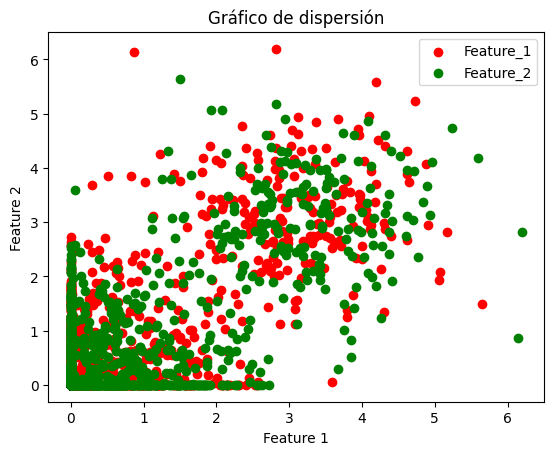

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df_data2['Feature_1'], df_data2['Feature_2'], c='red', label='Feature_1')
plt.scatter(df_data2['Feature_2'], df_data2['Feature_1'], c='green', label='Feature_2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de dispersión')

plt.legend()
plt.show()

### 4. Preparación de los datos para el entrenamiento

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_data2, test_size=0.33, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
   index  Feature_1  Feature_2  Label
0    703   0.000000   1.501334      0
1    311   1.882024   1.345420      0
2    722   0.399688   0.000000      0
3    629   0.000000   0.000000      0
4      0   0.496714   0.000000      0

Conjunto de prueba:
   index  Feature_1  Feature_2  Label
0    521   1.078681   0.000000      0
1    737   0.000000   0.648280      0
2    740   0.722381   0.000000      0
3    660   0.056650   0.529693      0
4    411   2.298898   0.000000      0


### 5. Validación cruzada: optimización de parámetros

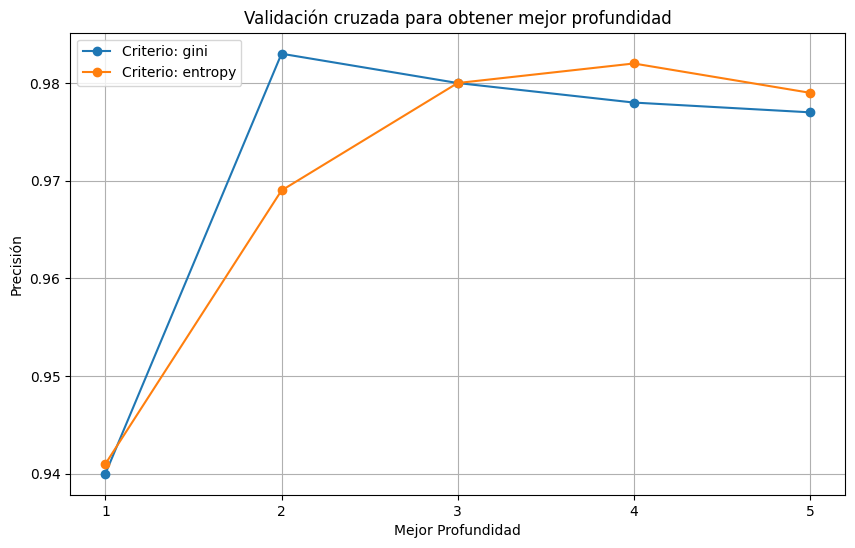


Gini
----------
Mejor profundidad: 2
Mayor Precisión: 0.9829999999999999

Entropía
----------
Mejor profundidad: 4
Mayor Precisión: 0.982


In [24]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

SPLITS = 5

# Crea un objeto KFold con divisiones
cv = KFold(n_splits=SPLITS, shuffle=True)

# Inicializa variables para almacenar los resultados
max_accuracy_gini = 0
best_depth_gini = 0
max_accuracy_entropy = 0
best_depth_entropy = 0

# Inicializa listas para almacenar los resultados
total_scores_gini = []
total_scores_entropy = []

# Definición del nivel de profundidad del árbol 
max_attributes = len(list(df_data2))
depth_range = range(1, max_attributes * 2) # Doble de los atributos

# Iteración sobre diferentes criterios
for criterion in ['gini', 'entropy']:
    
    # Inicializa lista para almacenar las precisiones por nivel de profundidad
    fold_accuracies = []  

    # Iteración sobre diferentes niveles de profundidad
    for max_depth in depth_range:
        
        # Almacena la precisión promedio para cada profundidad
        fold_accuracies_depth = []  

        # Configuración del modelo
        model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)

        for train_fold, test_fold in cv.split(df_data2):
            
            # Division train and test
            f_train = df_data2.loc[train_fold]
            f_test = df_data2.loc[test_fold]

            # Model training
            model.fit(X=f_train.drop(['Label'], axis=1), y=f_train['Label'])
            y_pred = model.predict(X=f_test.drop(['Label'], axis=1))
            acc = accuracy_score(f_test['Label'], y_pred)

            # Almacena la precisión para el fold actual
            fold_accuracies_depth.append(acc)

        # Calculate and store the average accuracy for the current depth
        avg_accuracy = np.mean(fold_accuracies_depth)
        fold_accuracies.append(avg_accuracy)

    # Almacenar los resultados en la lista correspondiente
    if criterion == 'gini':
        total_scores_gini.append(fold_accuracies)
        # Verificar si la profundidad actual produce una mayor precisión
        max_acc = max(fold_accuracies)
        if max_acc > max_accuracy_gini:
            max_accuracy_gini = max_acc
            best_depth_gini = depth_range[fold_accuracies.index(max_acc)]  # Utilizar depth_range directamente
    elif criterion == 'entropy':
        total_scores_entropy.append(fold_accuracies)
        # Verificar si la profundidad actual produce una mayor precisión
        max_acc = max(fold_accuracies)
        if max_acc > max_accuracy_entropy:
            max_accuracy_entropy = max_acc
            best_depth_entropy = depth_range[fold_accuracies.index(max_acc)]  # Utilizar depth_range directamente


# Plot the results
plt.figure(figsize=(10, 6))
for i, scores in enumerate(total_scores_gini):
    plt.plot(depth_range, scores, marker='o', linestyle='-', label=f'Criterio: gini')

for i, scores in enumerate(total_scores_entropy):
    plt.plot(depth_range, scores, marker='o', linestyle='-', label=f'Criterio: entropy')

plt.title('Validación cruzada para obtener mejor profundidad')
plt.xlabel('Mejor Profundidad')
plt.ylabel('Precisión')
plt.xticks(depth_range)
plt.legend()
plt.grid(True)
plt.show()

# Gini
print('\nGini')
print('-'*10)
print(f"Mejor profundidad: {best_depth_gini}")
print(f"Mayor Precisión: {max_accuracy_gini}")

# Entropy
print('\nEntropía')
print('-'*10)
print(f"Mejor profundidad: {best_depth_entropy}")
print(f"Mayor Precisión: {max_accuracy_entropy}")


### 6. Creación del modelo con los mejores hiperparámetros

In [28]:
from sklearn.metrics import classification_report

X_train = train.drop(['Label', 'index'], axis=1)
y_train = train['Label']
X_test = test.drop(['Label', 'index'], axis=1)
y_test = test['Label']

model = DecisionTreeClassifier(max_depth = best_depth_entropy) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

# Información de la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es: {accuracy:.2f}")

print("\nInforme de Clasificación")
print(classification_report(y_test, y_pred)) 

La precisión del modelo es: 0.98

Informe de Clasificación
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       264
           1       0.97      0.95      0.96        66

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.98       330
weighted avg       0.98      0.98      0.98       330



### 7. Visualizacion del árbol de decisión

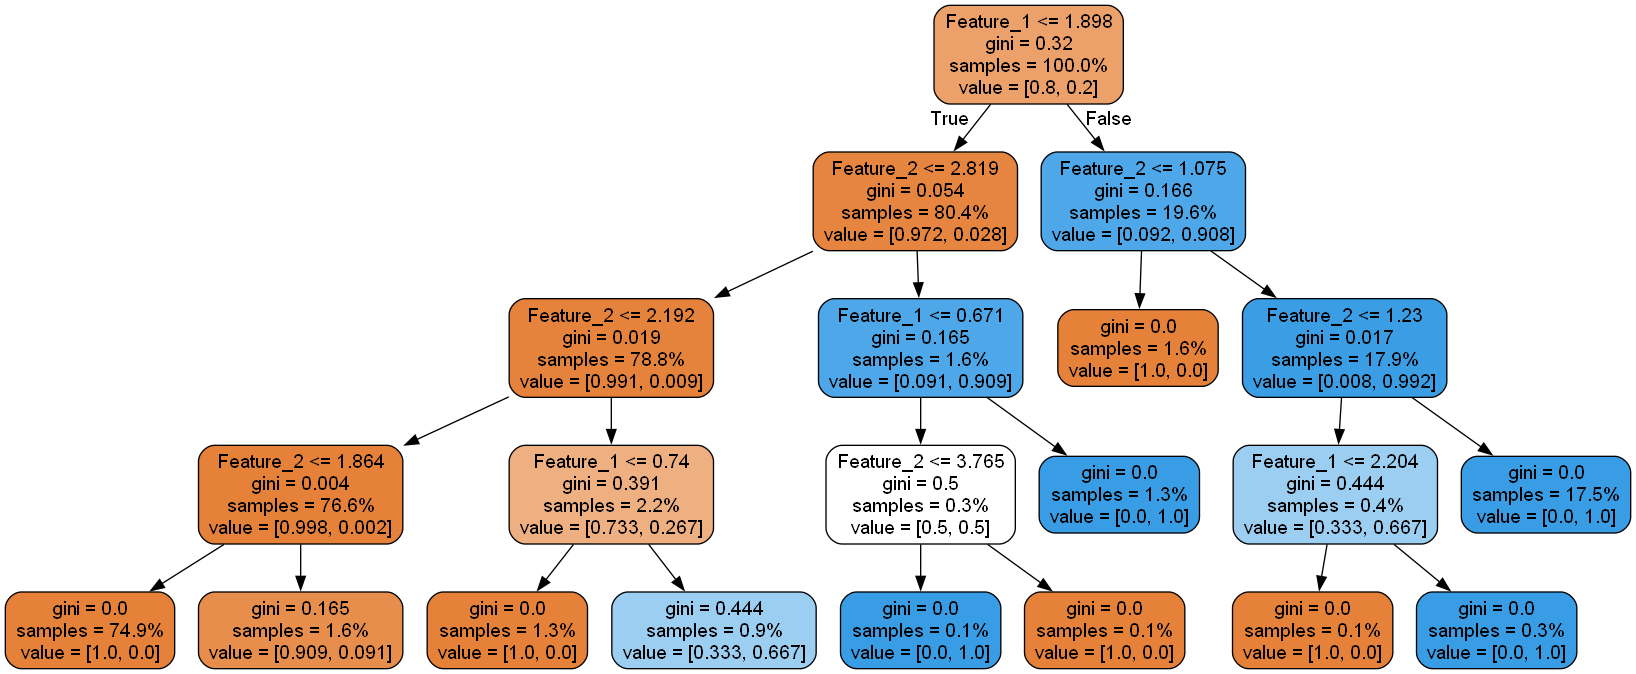

In [26]:
import pydot
from IPython.display import Image
from io import StringIO
from sklearn import tree

# Crear un archivo .dot con la información del árbol
dot_data = StringIO()

# Obtener los nombres de las columnas menos la última y convertirlos a lista
columns_names = df_data2.columns[:-1].tolist()

# Exportar el árbol a un archivo .dot
# proportion = True: muestra samples en porcentaje en lugar de número de muestras
tree.export_graphviz(model, out_file = dot_data, proportion = True, feature_names = columns_names, rounded = True, filled = True)

# Crea el gráfico del árbol
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### 8. Visualización de la importancia de las variables
La importancia de las variables se deriva del propio modelo, y se calcula observando cómo cada característica contribuye a reducir la impureza (o aumentar la pureza) de los nodos en el árbol de decisión durante el proceso de entrenamiento.

Informe de Importancia de las Variables:
     Feature  Importance
0  Feature_1    0.804062
1  Feature_2    0.195938


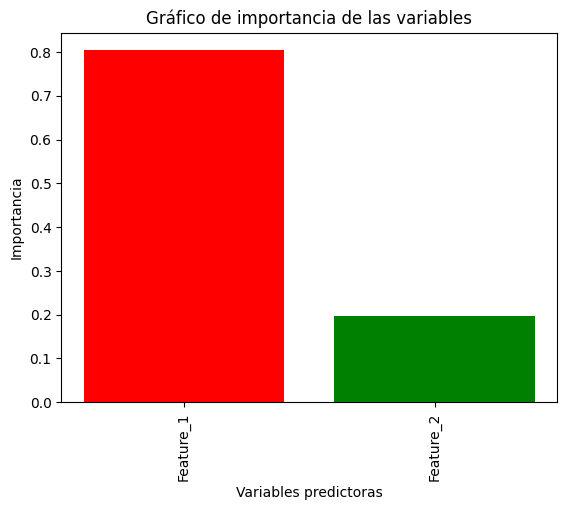

In [27]:
importances = model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
feature_names = df_data2.columns[:-1]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(feature_names, importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()